In [1]:
''' Computer side'''

import zmq
import io
from PIL import Image
import numpy as np

try: 
    context = zmq.Context()
    print('Connecting to server...')
    socket = context.socket(zmq.REQ)
    socket.connect("tcp://10.164.7.213:5555")
    print('Server connected')

    for request in range(5):
        print("Sending request n.%s..." % request)
        socket.send(b'Client camera request')

        image_stream = io.BytesIO()
        message = socket.recv()
        print("Received reply n.%s [ %s ]" % (request, len(message)))
        
        image_stream.write(message)
        image_stream.seek(0)

        image = Image.open(image_stream)        
        array = np.array(image.getdata()).reshape(image.size[1], image.size[0], 3)
        print(array.shape)
        # image.show()

finally:         
    print('\nNo more requests, sending kill signal')
    socket.send(b'END')
    
    socket.close()
    context.term()
    print('\nSocket and context closed')

Connecting to server...
Server connected
Sending request n.0...
Received reply n.0 [ 186243 ]
(480, 640, 3)
Sending request n.1...
Received reply n.1 [ 186565 ]
(480, 640, 3)
Sending request n.2...
Received reply n.2 [ 187442 ]
(480, 640, 3)
Sending request n.3...
Received reply n.3 [ 186393 ]
(480, 640, 3)
Sending request n.4...
Received reply n.4 [ 191530 ]
(480, 640, 3)

No more requests, sending kill signal

Socket and context closed


In [2]:
import numpy as np


In [3]:

np.array(image.getdata()).reshape(image.size[0], image.size[1], 3).shape

(640, 480, 3)

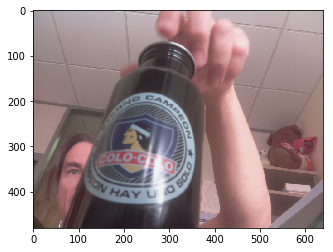

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(255-array*1.)

In [5]:
print(array.min(), array.max())

250